In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import keras
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout,BatchNormalization, Activation
from keras.initializers import glorot_uniform
from keras.callbacks import LearningRateScheduler, EarlyStopping
from keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
import lightgbm as lgb

2024-06-24 13:56:01.564171: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-24 13:56:01.608872: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-24 13:56:02.259616: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
y_train = pd.read_csv('../Dataset_MovieSummaries/y_train1.csv')
y_train.drop('Unnamed: 0', axis=1, inplace=True)
x_train = pd.read_csv('../Dataset_MovieSummaries/X_train1.csv')
x_train.drop('Unnamed: 0', axis=1, inplace=True)
y_test = pd.read_csv('../Dataset_MovieSummaries/y_test1.csv')
y_test.drop('Unnamed: 0', axis=1, inplace=True)
x_test = pd.read_csv('../Dataset_MovieSummaries/X_test1.csv')
x_test.drop('Unnamed: 0', axis=1, inplace=True)

In [3]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [4]:
x_train.reset_index(drop = True, inplace = True)
y_train.reset_index(drop = True, inplace = True)
x_val.reset_index(drop = True, inplace = True)
y_val.reset_index(drop = True, inplace = True)
x_test.reset_index(drop = True, inplace = True)
y_test.reset_index(drop = True, inplace = True)

In [5]:

precision = {}
recall= {}
f1={}

## Deep learning

In [6]:

def step_decay_schedule(initial_lr=0.001, decay_factor=0.5, step_size=10):
    def schedule(epoch):
        return max(initial_lr * math.pow(decay_factor, math.floor((1+epoch)/step_size)), 0.000001)
    return LearningRateScheduler(schedule)
    
learning_rate = 0.0001  # Adjust this value as needed
optimizer = Adam(learning_rate=learning_rate)
# Define the model
model = Sequential()
model.add(Dense(512, input_shape=(x_train.shape[1],), kernel_initializer=glorot_uniform(),kernel_regularizer=l2(0.05)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(128, kernel_initializer=glorot_uniform(),kernel_regularizer=l2(0.05)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64, kernel_initializer=glorot_uniform(),kernel_regularizer=l2(0.05)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(y_train.shape[1], activation='sigmoid'))  # Output layer with softmax activation for multiclass classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Print model summary
model.summary()

2024-06-24 13:56:04.048924: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
/home/asolta2s/myenv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       512,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 12)             │           780 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 590,028 (2.25 MB)

 Trainable params: 588,620 (2.25 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [7]:
batch_size = 64
epochs = 200
early_stopping = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)

# Train the model
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_val, y_val),
                   shuffle=True,
                   callbacks=[step_decay_schedule(initial_lr=0.0001, decay_factor=0.6, step_size=10),early_stopping ])

Epoch 1/200
131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.0849 - loss: 43.5319 - val_accuracy: 0.0187 - val_loss: 29.3327 - learning_rate: 1.0000e-04
Epoch 2/200
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0876 - loss: 26.0932 - val_accuracy: 0.0464 - val_loss: 17.6524 - learning_rate: 1.0000e-04
Epoch 3/200
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1065 - loss: 15.7603 - val_accuracy: 0.0651 - val_loss: 10.8014 - learning_rate: 1.0000e-04
Epoch 4/200
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1178 - loss: 9.7121 - val_accuracy: 0.0890 - val_loss: 6.8224 - learning_rate: 1.0000e-04
Epoch 5/200
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1392 - loss: 6.1878 - val_accuracy: 0.1269 - val_loss: 4.4993 - learning_rate: 1.0000e-04
Epoch 6/200
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1692 - loss: 4.1200 - val_accuracy: 0.1886 - val_loss: 3.1102 - learning_rate: 1.0000e-04
Epoch 7/200
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

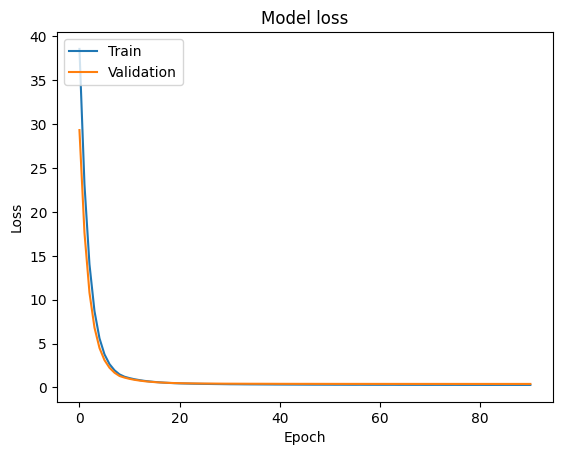

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [9]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

# Print the test accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3611 - loss: 0.4054
Test Accuracy: 36.12%


In [10]:

# Predict and evaluate the model
y_pred = model.predict(x_test)
y_pred_binary = (y_pred >= 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy:.2f}')

# Detailed classification report
report = classification_report(y_test, y_pred_binary, target_names=list(y_train.columns))
print(report)
precision['DL'], recall['DL'], f1['DL'], _ = precision_recall_fscore_support(y_test, y_pred_binary, average='micro')

82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.24
                  precision    recall  f1-score   support

          Action       0.70      0.52      0.60       581
Action/Adventure       0.72      0.49      0.59       576
       Adventure       0.73      0.45      0.56       533
          Comedy       0.64      0.28      0.39       646
   Crime Fiction       0.64      0.42      0.51       421
           Drama       0.72      0.59      0.65       970
     Family Film       0.76      0.61      0.67       479
          Horror       0.81      0.68      0.74       589
    Romance Film       0.71      0.60      0.65       460
  Romantic drama       0.73      0.63      0.67       408
      Short Film       0.82      0.67      0.74       584
        Thriller       0.62      0.38      0.47       536

       micro avg       0.72      0.53      0.61      6783
       macro avg       0.72      0.53      0.60      6783
    weighted avg       0.72      0.53      0.60      6783
     samples avg

/home/asolta2s/myenv/lib64/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [11]:
model.save('model1.keras')


## Logistic Regression

In [12]:
lr = LogisticRegression()
clf = OneVsRestClassifier(lr)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
y_pred_binary = (y_pred >= 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy:.2f}')

# Detailed classification report
report = classification_report(y_test, y_pred_binary, target_names=list(y_train.columns))
print(report)
precision['LogisticReg'], recall['LogisticReg'], f1['LogisticReg'], _ = precision_recall_fscore_support(y_test, y_pred_binary, average='micro')

Accuracy: 0.17
                  precision    recall  f1-score   support

          Action       0.72      0.42      0.53       581
Action/Adventure       0.68      0.37      0.48       576
       Adventure       0.73      0.34      0.46       533
          Comedy       0.62      0.24      0.35       646
   Crime Fiction       0.68      0.32      0.43       421
           Drama       0.70      0.56      0.62       970
     Family Film       0.80      0.44      0.57       479
          Horror       0.83      0.52      0.64       589
    Romance Film       0.76      0.40      0.52       460
  Romantic drama       0.82      0.43      0.57       408
      Short Film       0.88      0.59      0.71       584
        Thriller       0.62      0.28      0.39       536

       micro avg       0.74      0.42      0.53      6783
       macro avg       0.74      0.41      0.52      6783
    weighted avg       0.73      0.42      0.53      6783
     samples avg       0.58      0.44      0.47      67

/home/asolta2s/myenv/lib64/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## SVM

In [13]:
clf = OneVsRestClassifier(SVC())
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

y_pred_binary = (y_pred >= 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy:.2f}')

# Detailed classification report
report = classification_report(y_test, y_pred_binary, target_names=list(y_train.columns))
print(report)
precision['SVM'], recall['SVM'], f1['SVM'], _ = precision_recall_fscore_support(y_test, y_pred_binary, average='micro')


Accuracy: 0.21
                  precision    recall  f1-score   support

          Action       0.77      0.43      0.55       581
Action/Adventure       0.76      0.42      0.54       576
       Adventure       0.82      0.40      0.54       533
          Comedy       0.76      0.23      0.35       646
   Crime Fiction       0.71      0.31      0.43       421
           Drama       0.72      0.55      0.63       970
     Family Film       0.85      0.49      0.62       479
          Horror       0.85      0.57      0.68       589
    Romance Film       0.78      0.44      0.56       460
  Romantic drama       0.84      0.49      0.62       408
      Short Film       0.89      0.59      0.71       584
        Thriller       0.73      0.26      0.38       536

       micro avg       0.79      0.44      0.56      6783
       macro avg       0.79      0.43      0.55      6783
    weighted avg       0.79      0.44      0.56      6783
     samples avg       0.59      0.45      0.48      67

/home/asolta2s/myenv/lib64/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## LghtGBM

In [14]:

early_stopping_callback = lgb.early_stopping(stopping_rounds=10)
def train_and_predict(X_train, X_test, y_train, y_test):
    predictions = np.zeros_like(y_test)
    for i, label in enumerate(y_train.columns):
        print(f'Training model for label: {label}')
        lgb_train = lgb.Dataset(X_train, y_train.iloc[:, i])
        lgb_eval = lgb.Dataset(X_test, y_test.iloc[:, i], reference=lgb_train)

        params = {
            'objective': 'binary',
            'metric': 'binary_logloss',
            'boosting_type': 'gbdt',
            'num_leaves': 31,
            'learning_rate': 0.05,
            'feature_fraction': 0.9
        }

        gbm = lgb.train(params,
                        lgb_train,
                        num_boost_round=100,
                        valid_sets=lgb_eval,
                        callbacks=[early_stopping_callback])

        y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
        predictions[:, i] = (y_pred > 0.5).astype(int)
    return predictions

# Train the model and get predictions
y_pred = train_and_predict(x_train, x_test, y_train, y_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Detailed classification report
report = classification_report(y_test, y_pred, target_names=list(y_train.columns))
print(report)

Training model for label: Action
[LightGBM] [Info] Number of positive: 1881, number of negative: 6472
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 3.599765 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 144605
[LightGBM] [Info] Number of data points in the train set: 8353, number of used features: 1000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225189 -> initscore=-1.235682
[LightGBM] [Info] Start training from score -1.235682
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.366331
Training model for label: Action/Adventure
[LightGBM] [Info] Number of positive: 1858, number of negative: 6495
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 2.083101 seconds.
You can set `force_row_wise=true` to remov

/home/asolta2s/myenv/lib64/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [15]:

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Detailed classification report
report = classification_report(y_test, y_pred, target_names=list(y_train.columns))
precision['LGBM'], recall['LGBM'], f1['LGBM'], _ = precision_recall_fscore_support(y_test, y_pred, average='micro')
print(report)

Accuracy: 0.19
                  precision    recall  f1-score   support

          Action       0.75      0.43      0.55       581
Action/Adventure       0.72      0.39      0.51       576
       Adventure       0.76      0.40      0.52       533
          Comedy       0.72      0.25      0.37       646
   Crime Fiction       0.67      0.39      0.49       421
           Drama       0.71      0.55      0.62       970
     Family Film       0.82      0.49      0.61       479
          Horror       0.83      0.56      0.67       589
    Romance Film       0.74      0.50      0.60       460
  Romantic drama       0.75      0.49      0.59       408
      Short Film       0.86      0.63      0.72       584
        Thriller       0.68      0.29      0.41       536

       micro avg       0.75      0.45      0.56      6783
       macro avg       0.75      0.45      0.55      6783
    weighted avg       0.75      0.45      0.56      6783
     samples avg       0.58      0.46      0.48      67

/home/asolta2s/myenv/lib64/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Metrics Visualization

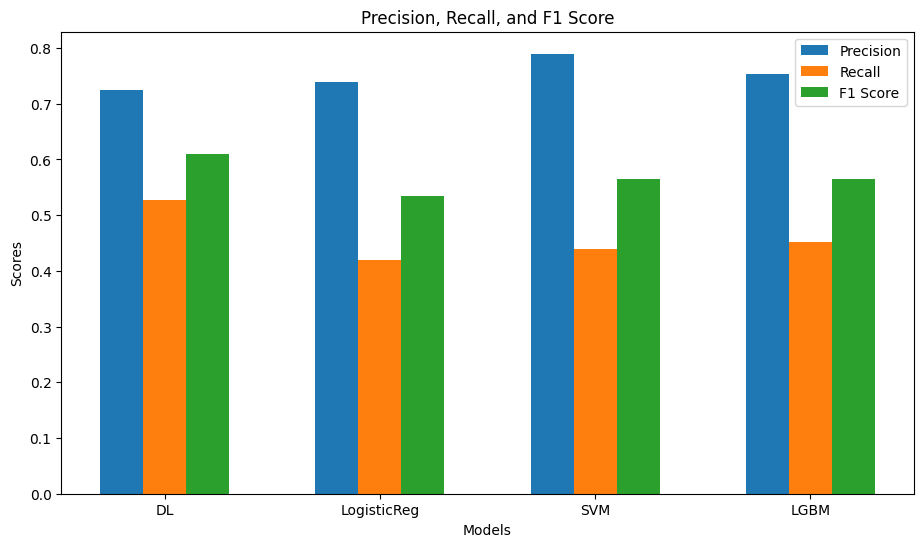

In [16]:
# Prepare data for plotting
labels = precision.keys()
precision_values = precision.values()
recall_values = recall.values()
f1_values = f1.values()

# Set the position of the bars on the x-axis
x = range(len(labels))

# Width of a bar
bar_width = 0.2
# Create the plot
fig, ax = plt.subplots(figsize=(11, 6))

# Plot bars
ax.bar(x, precision_values, width=bar_width, label='Precision', align='center')
ax.bar([p + bar_width for p in x], recall_values, width=bar_width, label='Recall', align='center')
ax.bar([p + bar_width * 2 for p in x], f1_values, width=bar_width, label='F1 Score', align='center')

# Set the labels for the x-axis
ax.set_xticks([p + bar_width for p in x])
ax.set_xticklabels(labels)

# Add labels, title, and legend
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1 Score')
ax.legend()

# Show the plot
plt.show()